In [1]:
twitter = 'topic_state_info.json'
traffic_sudo = 'traffic_sudo.json'
political_sudo = 'political_sudo.json'
criminal_sudo = 'criminal_sudo.json'
employment_sudo = 'employment_sudo.json'

In [7]:
twitter

'topic_state_info.json'

In [173]:
import json

def get_graph_info(topic, twitter_file, sudo_file,x_cols):
    STATE_NAME = ['New_South_Wales','Victoria','Queensland','South_Australia',
              'Western_Australia','Tasmania','Northern_Territory','Australian_Capital_Territory']

    plot_dict = {'state': [],'post_count':[],'user_count':[],'post_ratio':[],'user_ratio':[]}
    with open(twitter_file) as file:
        data = json.load(file)
    topic_twitter= data[topic]
#     print(topic_twitter)
    

    
    with open(sudo_file) as file:
        sudo = json.load(file)
#     print(sudo)
    
    for state in STATE_NAME:
        if state in sudo:
            sudo_info = sudo[state]
            topic_twitter_info = topic_twitter[state]
            plot_dict['state'].append(state)
            plot_dict['post_count'].append(topic_twitter_info['tweet_count'])
            plot_dict['post_ratio'].append(topic_twitter_info['tweet_ratio'])
            plot_dict['user_count'].append(topic_twitter_info['user_count'])
            plot_dict['user_ratio'].append(topic_twitter_info['user_ratio'])
            for col in x_cols:
                if col not in plot_dict:
                    plot_dict[col]= [sudo_info[col]]
                else:
                    plot_dict[col].append(sudo_info[col])
    return plot_dict

In [192]:
import numpy as np
import matplotlib.pyplot as plt

def plot_chart(plot_dict,bars,lines,plot_name,line_label):
    
    df = pd.DataFrame.from_dict(plot_dict)

    
    # Sample data for the bar plots
#     x = df['state'].to_list()
#     x = ['NSW','VIC','QLD','SA','WA','TAS','NT','ACT']
    STATE_NAME = df['state'].to_list()

    # x = ['NSW','VIC','QLD','SA','WA','TAS','NT','ACT']
    # Mapping dictionary for shorter names
    label_mapping = {
        'New_South_Wales': 'NSW',
        'Victoria': 'VIC',
        'Queensland':'QLD',
        'South_Australia': 'SA',
        'Western_Australia':'WA',
        'Tasmania':'TAS',
        'Northern_Territory':'NT',
        'Australian_Capital_Territory': 'ACT'
    }

    # Convert x-labels to shorter names
    x = [label_mapping[label] if label in label_mapping else label for label in STATE_NAME]
    
    
    bar_width = 0.35
    
    y_bars = []
    for bar in bars:
        y_bars.append(df[bar].to_list())
        
    print(y_bars)
        
    y_lines = []
    for line in lines:
        y_lines.append(df[line].to_list())
    print(y_lines)
        

    # Create a figure and axis objects
    fig, ax = plt.subplots()
#     "#CAAB8F"
    
    COLOUR = ["#FEBBBA","#BDD0FB","#4676B6","#FF9797","#B2827A","#B7D8BC"]
    # Plot the bar plots with different colors

    ax.bar(np.array([i for i in range(len(x))]) - bar_width/2, y_bars[0], label=bars[0], width=bar_width, color=COLOUR[0], alpha=0.7)
    ax.bar(np.array([i for i in range(len(x))]) + bar_width/2, y_bars[1], label=bars[1], width=bar_width, color=COLOUR[1], alpha=0.7)
    

    # Set the y-axis label for bars
    ax.set_ylabel("Percentage")

    # Create a twin y-axis for the line plots
    ax2 = ax.twinx()

    # Plot the line plots with different colors
    for i in range(len(y_lines)):
        ax2.plot(x, y_lines[i], marker='o', linestyle='-', label=lines[i], color=COLOUR[i+2])
#     ax2.plot(x, y_line2, marker='o', linestyle='-', label='Line 2', color='purple')

    # Set the y-axis label for lines
    ax2.set_ylabel(line_label)

    # Set labels and title
    ax.set_xlabel('State Name')
    ax.set_title(plot_name)

    # Display legends
    
    

    ax.legend(loc='center left', bbox_to_anchor=(1.12, 0.5 + 0.04* len(y_bars)))
    ax2.legend(loc='center left', bbox_to_anchor=(1.12, 0.5 - 0.04* len(y_lines)))
   

#     Show the plot
    plt.show()


[[0.30517114049722666, 0.3058406470387448, 0.31384743360044104, 0.29368857019224825, 0.3250848348066624, 0.34351802044109736, 0.30976362602550567, 0.36161332436602445], [0.6170853700125043, 0.6350188101766243, 0.6001502488496573, 0.6203537554473212, 0.6105395758975436, 0.5633500357909806, 0.4676258992805755, 0.657671164417791]]
[[2561, 1698, 1344, 642, 741, 305, 69, 79], [2279.7798963160008, 1529.9651703689985, 1240.6236592580003, 580.3644889039997, 694.8065777769998, 259.0274962959998, 81.59863703400005, 99.01782222299998]]


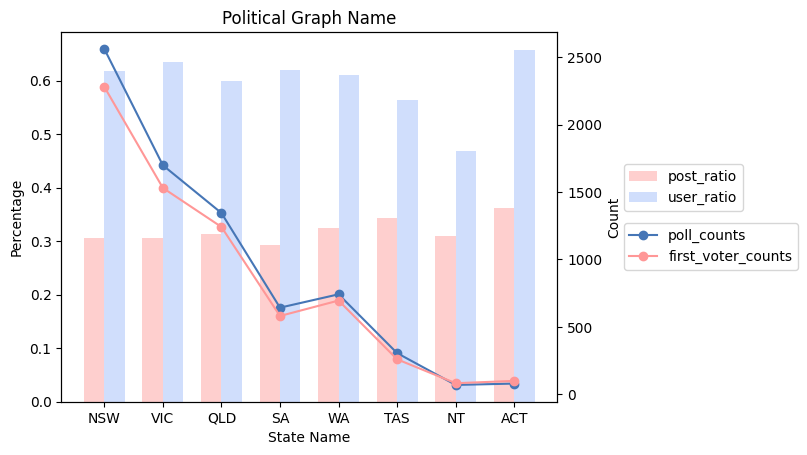

In [193]:
political_plot_dict = get_graph_info('political', twitter, political_sudo,['poll_counts','first_voter_counts'])
plot_chart(political_plot_dict,['post_ratio','user_ratio'],['poll_counts','first_voter_counts'],"Political Graph Name","Count")





[[0.05281562866332234, 0.050766868145931364, 0.04448016044727425, 0.049381387842926304, 0.04727479489887093, 0.05087629069905448], [0.27168352847561666, 0.25504742229317307, 0.26531658549089976, 0.22333571939871152, 0.1672661870503597, 0.25237381309345325]]
[[39.4, 18.4, 35.5, 28.9, 43.5, 31.3], [12.6, 22.6, 10.5, 16.7, 19.0, 23.5], [10.7, 13.4, 14.7, 11.6, 4.5, 15.7]]


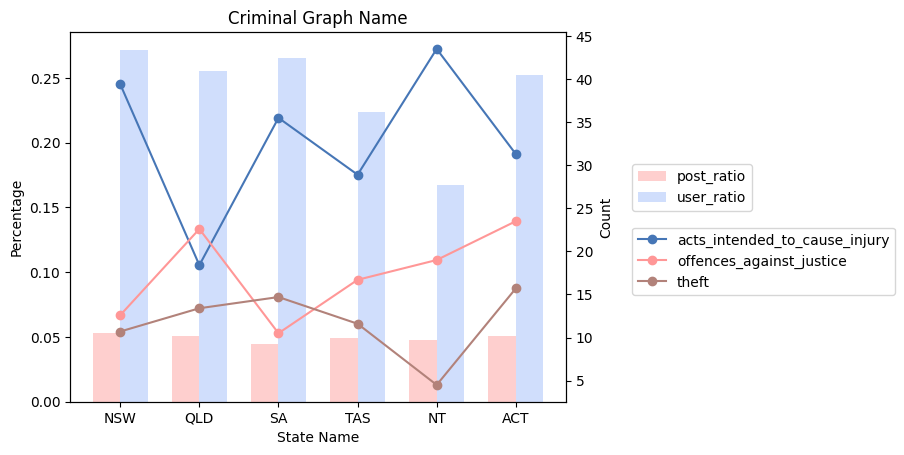

In [194]:
criminal_plot_dict = get_graph_info("criminal", twitter, criminal_sudo,["acts_intended_to_cause_injury","offences_against_justice","theft"])

plot_chart(criminal_plot_dict,['post_ratio','user_ratio'],["acts_intended_to_cause_injury","offences_against_justice","theft"],"Criminal Graph Name","Count")



[[0.06686010662349941, 0.06873484949290999, 0.06501397885452147, 0.0695912578214612, 0.07076268233452522, 0.07210328133405057, 0.08005036146535618], [0.31283392065476867, 0.33679780654211566, 0.30462954268006387, 0.3199179697513458, 0.318076842326265, 0.2770221904080172, 0.20503597122302158]]
[[5.2263047, 5.2263047, 5.2263047, 5.2263047, 5.2263047, 5.2263047, 5.2263047], [4.287036499999999, 4.287036499999999, 4.287036499999999, 4.287036499999999, 4.287036499999999, 4.287036499999999, 4.287036499999999], [0.8541487499999998, 0.8541487499999998, 0.8541487499999998, 0.8541487499999998, 0.8541487499999998, 0.8541487499999998, 0.8541487499999998]]


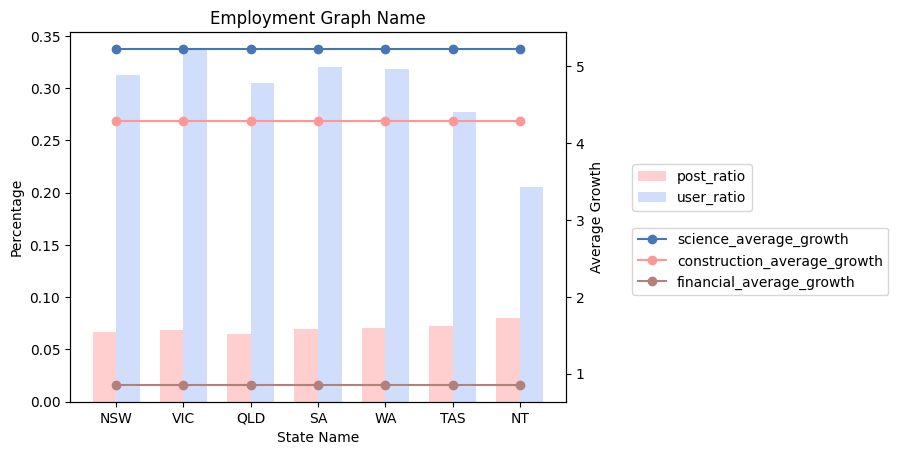

In [195]:
employment_plot_dict = get_graph_info("employment", twitter, employment_sudo,["science_average_growth","construction_average_growth","financial_average_growth","total_average_growth"])

plot_chart(employment_plot_dict,['post_ratio','user_ratio'],["science_average_growth","construction_average_growth","financial_average_growth"],"Employment Graph Name","Average Growth")


[[0.0519878152672037, 0.05776429137570943, 0.05262497292827469, 0.05140357022659056, 0.05223572550512225, 0.05112426035502959, 0.05194541466980749, 0.057581991533805436], [0.3162441741502785, 0.3338646942549257, 0.2964597614799512, 0.31453473468341453, 0.3065294982154105, 0.2677165354330709, 0.20953237410071943, 0.29735132433783107]]
[[1972838, 1917104, 1772270, 648904, 1002826, 200179, 90540, 190134], [54633, 50900, 37095, 13224, 38490, 2972, 1376, 5338], [8056, 11185, 5060, 1578, 6240, 252, 174, 535], [3681647, 3161090, 2440843, 838665, 1304353, 254395, 106477, 248388]]


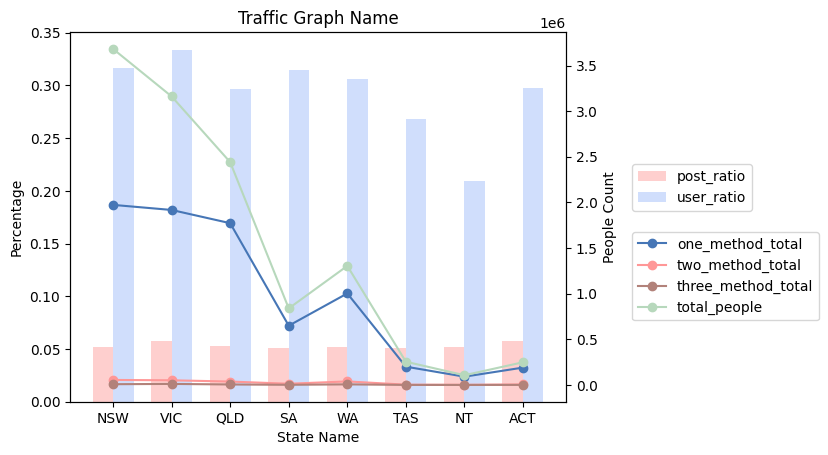

In [196]:
traffic_plot_dict = get_graph_info("traffic", twitter, traffic_sudo,["one_method_total","two_method_total","three_method_total","total_people"])

plot_chart(traffic_plot_dict,['post_ratio','user_ratio'],["one_method_total","two_method_total","three_method_total","total_people"],"Traffic Graph Name","People Count")

